https://huggingface.co/spaces/evaluate-metric/bertscore
https://github.com/Tiiiger/bert_score#readme

In [97]:
import pandas as pd
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt

In [6]:
book=pd.read_csv('/Volumes/T7/mt-hemingway/data/book_final.csv')

In [7]:
book.head(1)

,original,small,big,OPUS_small,OPUS_big,kakao_org,M2M100_org,M2M100_small,M2M100_big,kakao_small,kakao_big,google_org,google_small,google_big
0,He was an old man who fished alone in a skiff ...,산티아고는 멕시코 만류에서 조각배를 타고 혼자 고기잡이를 하는 늙은 어부였다. 오늘...,그는 멕시코 해류에서 조각배를 타고 홀로 고기잡이하는 노인이었다. 여든 날하고도 나...,Santiago was an old fisherman riding alone in...,He was an old man riding on a rock boat in th...,"그는 멕시코 만류에서 보트를 타고 혼자 낚시를 하던 노인이었는데, 지금은 84일째 ...","그는 골프 스트림에서 스키프에서 혼자 낚시 한 늙은이였고, 지금은 물고기를 먹지 않...",Santiago was an old fisherman on a sculptural ...,He was an elderly man on a sculptural boat in ...,Santiago was an old fisherman who fished alone...,He was an old man fishing alone in a carving b...,"그는 걸프 스트림의 스키프에서 혼자 낚시를 한 노인이었고, 물고기를 먹지 않고 82...",Santiago was an old fisherman who was fishing ...,He was an elderly man who was fishing alone on...


In [25]:
from evaluate import load
bertscore = load('bertscore')

In [90]:
def bertscore_compute(data:pd.DataFrame, compare1:str, compare2:str, metric:str):
    bertscores=[]
    for idx, val in tqdm(data.iterrows()):
        predictions=[]
        predictions.append(val[compare1])
        references=[]
        references.append(val[compare2])
        # bertscores.append(predictions)
        bertscores.append(bertscore.compute(predictions=predictions, references=references,
        lang='en', model_type='distilbert-base-uncased', device='gpu')[metric][0])
    return bertscores

In [91]:
OPUS_small=bertscore_compute(book, 'original', 'OPUS_small', 'f1')
OPUS_big=bertscore_compute(book, 'original', 'OPUS_big', 'f1')
M2M100_small=bertscore_compute(book, 'original', 'M2M100_small', 'f1')
M2M100_big=bertscore_compute(book, 'original', 'M2M100_big', 'f1')
kakao_small=bertscore_compute(book, 'original', 'kakao_small', 'f1')
kakao_big=bertscore_compute(book, 'original', 'kakao_big', 'f1')
google_small=bertscore_compute(book, 'original', 'google_small', 'f1')
google_big=bertscore_compute(book, 'original', 'google_big', 'f1')

768it [02:02,  6.25it/s]
768it [02:13,  5.74it/s]
768it [02:34,  4.96it/s]
768it [02:34,  4.97it/s]
768it [02:29,  5.13it/s]
768it [02:25,  5.29it/s]
768it [02:29,  5.13it/s]
768it [02:26,  5.24it/s]


In [92]:
bert_df=pd.DataFrame({'OPUS_small':OPUS_small, 'OPUS_big':OPUS_big, 'M2M100_small':M2M100_small, 'M2M100_big':M2M100_big, 'kakao_small':kakao_small, 'kakao_big':kakao_big, 'google_small':google_small, 'google_big':google_big})

In [93]:
bert_df.to_csv('/Volumes/T7/mt-hemingway/data/bert_df.csv', index=False)

In [96]:
pos_opus_small=bert_df['OPUS_small'].copy()
neg_opus_small=bert_df['OPUS_small'].copy()
pos_opus_small[pos_opus_small<=0.5]=np.nan
neg_opus_small[neg_opus_small>0.5]=np.nan
pos_opus_big=bert_df['OPUS_big'].copy()
neg_opus_big=bert_df['OPUS_big'].copy()
pos_opus_big[pos_opus_big<=0.5]=np.nan
neg_opus_big[neg_opus_big>0.5]=np.nan
pos_m2m100_small=bert_df['M2M100_small'].copy()
neg_m2m100_small=bert_df['M2M100_small'].copy()
pos_m2m100_small[pos_m2m100_small<=0.5]=np.nan
neg_m2m100_small[neg_m2m100_small>0.5]=np.nan
pos_m2m100_big=bert_df['M2M100_big'].copy()
neg_m2m100_big=bert_df['M2M100_big'].copy()
pos_m2m100_big[pos_m2m100_big<=0.5]=np.nan
neg_m2m100_big[neg_m2m100_big>0.5]=np.nan
pos_kakao_small=bert_df['kakao_small'].copy()
neg_kakao_small=bert_df['kakao_small'].copy()
pos_kakao_small[pos_kakao_small<=0.5]=np.nan
neg_kakao_small[neg_kakao_small>0.5]=np.nan
pos_kakao_big=bert_df['kakao_big'].copy()
neg_kakao_big=bert_df['kakao_big'].copy()
pos_kakao_big[pos_kakao_big<=0.5]=np.nan
neg_kakao_big[neg_kakao_big>0.5]=np.nan
pos_google_small=bert_df['google_small'].copy()
neg_google_small=bert_df['google_small'].copy()
pos_google_small[pos_google_small<=0.5]=np.nan
neg_google_small[neg_google_small>0.5]=np.nan
pos_google_big=bert_df['google_big'].copy()
neg_google_big=bert_df['google_big'].copy()
pos_google_big[pos_google_big<=0.5]=np.nan
neg_google_big[neg_google_big>0.5]=np.nan

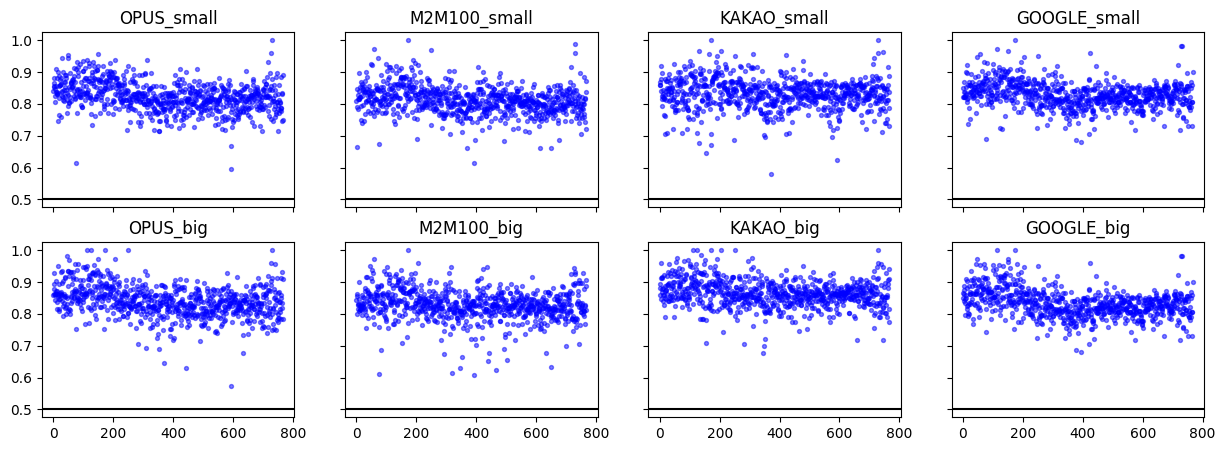

In [98]:
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(15, 5), sharex=True, sharey=True)
axes[0,0].scatter(x=range(len(pos_opus_small)), y=pos_opus_small, color='blue', label='OPUS_small', alpha=0.5, s=8)
axes[0,0].scatter(x=range(len(neg_opus_small)), y=neg_opus_small, color='red', label='OPUS_small', alpha=0.5, s=8)
axes[0,0].axhline(y=0.5, color='black', linestyle='-')
axes[0,0].set_title('OPUS_small')
axes[1,0].scatter(x=range(len(pos_opus_big)), y=pos_opus_big, color='blue', label='OPUS_big', alpha=0.5, s=8)
axes[1,0].scatter(x=range(len(neg_opus_big)), y=neg_opus_big, color='red', label='OPUS_big', alpha=0.5, s=8)
axes[1,0].axhline(y=0.5, color='black', linestyle='-')
axes[1,0].set_title('OPUS_big')
axes[0,1].scatter(x=range(len(pos_m2m100_small)), y=pos_m2m100_small, color='blue', label='M2M100_small', alpha=0.5, s=8)
axes[0,1].scatter(x=range(len(neg_m2m100_small)), y=neg_m2m100_small, color='red', label='M2M100_small', alpha=0.5, s=8)
axes[0,1].axhline(y=0.5, color='black', linestyle='-')
axes[0,1].set_title('M2M100_small')
axes[1,1].scatter(x=range(len(pos_m2m100_big)), y=pos_m2m100_big, color='blue', label='M2M100_big', alpha=0.5, s=8)
axes[1,1].scatter(x=range(len(neg_m2m100_big)), y=neg_m2m100_big, color='red', label='M2M100_big', alpha=0.5, s=8)
axes[1,1].axhline(y=0.5, color='black', linestyle='-')
axes[1,1].set_title('M2M100_big')
axes[0,2].scatter(x=range(len(pos_kakao_small)), y=pos_kakao_small, color='blue', label='kakao_small', alpha=0.5, s=8)
axes[0,2].scatter(x=range(len(neg_kakao_small)), y=neg_kakao_small, color='red', label='kakao_small', alpha=0.5, s=8)
axes[0,2].axhline(y=0.5, color='black', linestyle='-')
axes[0,2].set_title('KAKAO_small')
axes[1,2].scatter(x=range(len(pos_kakao_big)), y=pos_kakao_big, color='blue', label='kakao_big', alpha=0.5, s=8)
axes[1,2].scatter(x=range(len(neg_kakao_big)), y=neg_kakao_big, color='red', label='kakao_big', alpha=0.5, s=8)
axes[1,2].axhline(y=0.5, color='black', linestyle='-')
axes[1,2].set_title('KAKAO_big')
axes[0,3].scatter(x=range(len(pos_google_small)), y=pos_google_small, color='blue', label='google_small', alpha=0.5, s=8)
axes[0,3].scatter(x=range(len(neg_google_small)), y=neg_google_small, color='red', label='google_small', alpha=0.5, s=8)
axes[0,3].axhline(y=0.5, color='black', linestyle='-')
axes[0,3].set_title('GOOGLE_small')
axes[1,3].scatter(x=range(len(pos_google_big)), y=pos_google_big, color='blue', label='google_big', alpha=0.5, s=8)
axes[1,3].scatter(x=range(len(neg_google_big)), y=neg_google_big, color='red', label='google_big', alpha=0.5, s=8)
axes[1,3].axhline(y=0.5, color='black', linestyle='-')
axes[1,3].set_title('GOOGLE_big')
plt.savefig('/Volumes/T7/mt-hemingway/figure/bert_english.png')
plt.show()

In [102]:
def bertscore_compute_ko(data:pd.DataFrame, compare1:str, compare2:str, metric:str):
    bertscores=[]
    for idx, val in tqdm(data.iterrows()):
        predictions=[]
        predictions.append(val[compare1])
        references=[]
        references.append(val[compare2])
        # bertscores.append(predictions)
        bertscores.append(bertscore.compute(predictions=predictions, references=references,
        lang='ko', model_type='distilbert-base-uncased', device='gpu')[metric][0])
    return bertscores

In [105]:
small_big=bertscore_compute_ko(book, compare1='small', compare2='big', metric='f1')
small_kakao=bertscore_compute_ko(book, compare1='small', compare2='kakao_org', metric='f1')
small_M2M100=bertscore_compute_ko(book, compare1='small', compare2='M2M100_org', metric='f1')
small_google=bertscore_compute_ko(book, compare1='small', compare2='google_org', metric='f1')
big_kakao=bertscore_compute_ko(book, compare1='big', compare2='kakao_org', metric='f1')
big_M2M100=bertscore_compute_ko(book, compare1='big', compare2='M2M100_org', metric='f1')
big_google=bertscore_compute_ko(book, compare1='big', compare2='google_org', metric='f1')
kakao_M2M100=bertscore_compute_ko(book, compare1='kakao_org', compare2='M2M100_org', metric='f1')
kakao_google=bertscore_compute_ko(book, compare1='kakao_org', compare2='google_org', metric='f1')
M2M100_google=bertscore_compute_ko(book, compare1='M2M100_org', compare2='google_org', metric='f1')

768it [04:45,  2.69it/s]
768it [04:21,  2.93it/s]
768it [04:32,  2.82it/s]
768it [04:39,  2.75it/s]
768it [04:40,  2.74it/s]
768it [04:41,  2.73it/s]
768it [04:44,  2.70it/s]
768it [04:18,  2.97it/s]
768it [04:17,  2.98it/s]
768it [04:20,  2.95it/s]


In [107]:
korean_df=pd.DataFrame({'small_big':small_big, 'small_kakao_org':small_kakao, 'small_M2M100_org':small_M2M100, 'small_google_org':small_google, 'big_kakao_org':big_kakao, 'big_M2M100_org':big_M2M100, 'big_google_org':big_google, 'kakao_org_M2M100_org':kakao_M2M100, 'kakao_org_google_org':kakao_google, 'M2M100_org_google_org':M2M100_google})
korean_df.to_csv('/Volumes/T7/mt-hemingway/data/korean_bert_df.csv', index=False)

In [108]:
pos_small_big=korean_df['small_big'].copy()
neg_small_big=korean_df['small_big'].copy()
pos_small_big[pos_small_big<=0.5]=np.nan
neg_small_big[neg_small_big>0.5]=np.nan
pos_small_kakao=korean_df['small_kakao_org'].copy()
neg_small_kakao=korean_df['small_kakao_org'].copy()
pos_small_kakao[pos_small_kakao<=0.5]=np.nan
neg_small_kakao[neg_small_kakao>0.5]=np.nan
pos_small_M2M100=korean_df['small_M2M100_org'].copy()
neg_small_M2M100=korean_df['small_M2M100_org'].copy()
pos_small_M2M100[pos_small_M2M100<=0.5]=np.nan
neg_small_M2M100[neg_small_M2M100>0.5]=np.nan
pos_small_google=korean_df['small_google_org'].copy()
neg_small_google=korean_df['small_google_org'].copy()
pos_small_google[pos_small_google<=0.5]=np.nan
neg_small_google[neg_small_google>0.5]=np.nan
pos_big_kakao=korean_df['big_kakao_org'].copy()
neg_big_kakao=korean_df['big_kakao_org'].copy()
pos_big_kakao[pos_big_kakao<=0.5]=np.nan
neg_big_kakao[neg_big_kakao>0.5]=np.nan
pos_big_M2M100=korean_df['big_M2M100_org'].copy()
neg_big_M2M100=korean_df['big_M2M100_org'].copy()
pos_big_M2M100[pos_big_M2M100<=0.5]=np.nan
neg_big_M2M100[neg_big_M2M100>0.5]=np.nan
pos_big_google=korean_df['big_google_org'].copy()
neg_big_google=korean_df['big_google_org'].copy()
pos_big_google[pos_big_google<=0.5]=np.nan
neg_big_google[neg_big_google>0.5]=np.nan
pos_kakao_M2M100=korean_df['kakao_org_M2M100_org'].copy()
neg_kakao_M2M100=korean_df['kakao_org_M2M100_org'].copy()
pos_kakao_M2M100[pos_kakao_M2M100<=0.5]=np.nan
neg_kakao_M2M100[neg_kakao_M2M100>0.5]=np.nan
pos_kakao_google=korean_df['kakao_org_google_org'].copy()
neg_kakao_google=korean_df['kakao_org_google_org'].copy()
pos_kakao_google[pos_kakao_google<=0.5]=np.nan
neg_kakao_google[neg_kakao_google>0.5]=np.nan
pos_M2M100_google=korean_df['M2M100_org_google_org'].copy()
neg_M2M100_google=korean_df['M2M100_org_google_org'].copy()
pos_M2M100_google[pos_M2M100_google<=0.5]=np.nan
neg_M2M100_google[neg_M2M100_google>0.5]=np.nan

Downloading:   3%|▎         | 49.2M/1.43G [2:02:38<57:09:42, 6.69kB/s]


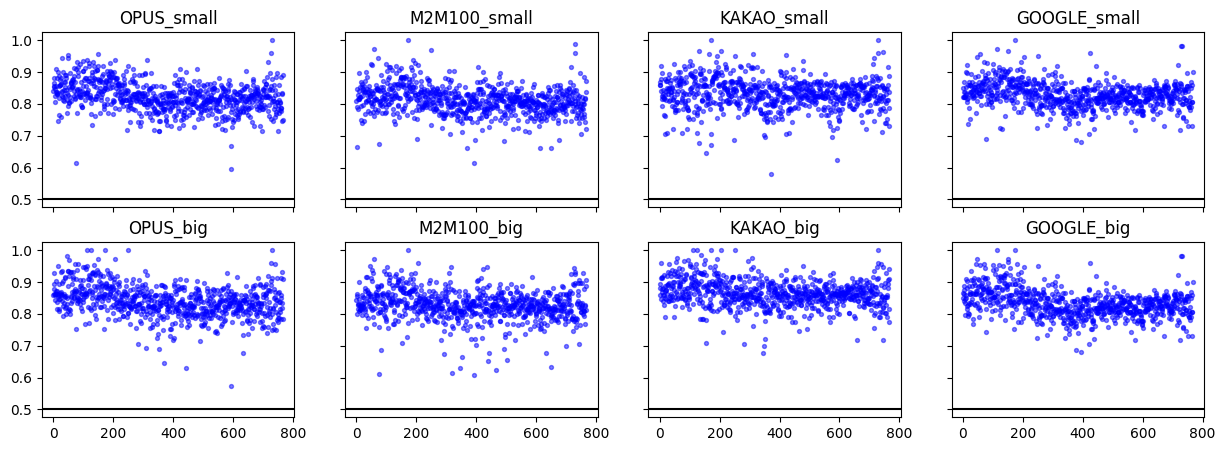

In [109]:
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(15, 5), sharex=True, sharey=True)
axes[0,0].scatter(x=range(len(pos_opus_small)), y=pos_opus_small, color='blue', label='OPUS_small', alpha=0.5, s=8)
axes[0,0].scatter(x=range(len(neg_opus_small)), y=neg_opus_small, color='red', label='OPUS_small', alpha=0.5, s=8)
axes[0,0].axhline(y=0.5, color='black', linestyle='-')
axes[0,0].set_title('OPUS_small')
axes[1,0].scatter(x=range(len(pos_opus_big)), y=pos_opus_big, color='blue', label='OPUS_big', alpha=0.5, s=8)
axes[1,0].scatter(x=range(len(neg_opus_big)), y=neg_opus_big, color='red', label='OPUS_big', alpha=0.5, s=8)
axes[1,0].axhline(y=0.5, color='black', linestyle='-')
axes[1,0].set_title('OPUS_big')
axes[0,1].scatter(x=range(len(pos_m2m100_small)), y=pos_m2m100_small, color='blue', label='M2M100_small', alpha=0.5, s=8)
axes[0,1].scatter(x=range(len(neg_m2m100_small)), y=neg_m2m100_small, color='red', label='M2M100_small', alpha=0.5, s=8)
axes[0,1].axhline(y=0.5, color='black', linestyle='-')
axes[0,1].set_title('M2M100_small')
axes[1,1].scatter(x=range(len(pos_m2m100_big)), y=pos_m2m100_big, color='blue', label='M2M100_big', alpha=0.5, s=8)
axes[1,1].scatter(x=range(len(neg_m2m100_big)), y=neg_m2m100_big, color='red', label='M2M100_big', alpha=0.5, s=8)
axes[1,1].axhline(y=0.5, color='black', linestyle='-')
axes[1,1].set_title('M2M100_big')
axes[0,2].scatter(x=range(len(pos_kakao_small)), y=pos_kakao_small, color='blue', label='kakao_small', alpha=0.5, s=8)
axes[0,2].scatter(x=range(len(neg_kakao_small)), y=neg_kakao_small, color='red', label='kakao_small', alpha=0.5, s=8)
axes[0,2].axhline(y=0.5, color='black', linestyle='-')
axes[0,2].set_title('KAKAO_small')
axes[1,2].scatter(x=range(len(pos_kakao_big)), y=pos_kakao_big, color='blue', label='kakao_big', alpha=0.5, s=8)
axes[1,2].scatter(x=range(len(neg_kakao_big)), y=neg_kakao_big, color='red', label='kakao_big', alpha=0.5, s=8)
axes[1,2].axhline(y=0.5, color='black', linestyle='-')
axes[1,2].set_title('KAKAO_big')
axes[0,3].scatter(x=range(len(pos_google_small)), y=pos_google_small, color='blue', label='google_small', alpha=0.5, s=8)
axes[0,3].scatter(x=range(len(neg_google_small)), y=neg_google_small, color='red', label='google_small', alpha=0.5, s=8)
axes[0,3].axhline(y=0.5, color='black', linestyle='-')
axes[0,3].set_title('GOOGLE_small')
axes[1,3].scatter(x=range(len(pos_google_big)), y=pos_google_big, color='blue', label='google_big', alpha=0.5, s=8)
axes[1,3].scatter(x=range(len(neg_google_big)), y=neg_google_big, color='red', label='google_big', alpha=0.5, s=8)
axes[1,3].axhline(y=0.5, color='black', linestyle='-')
axes[1,3].set_title('GOOGLE_big')
plt.savefig('/Volumes/T7/mt-hemingway/figure/english_bert.png')
plt.show()